In [90]:
import sqlite3
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
conn=sqlite3.connect('mydb.db')
cursor=conn.cursor()
conn,cursor

(<sqlite3.Connection at 0x17a22952120>, <sqlite3.Cursor at 0x17a228d9960>)

In [24]:
datas=list(cursor.execute('select * from youbike_data'))
datas

[(8395, '2021/03/17 09:39:36', '1001', '大鵬華城', 38, 1, 37, 1),
 (8396, '2021/03/17 09:39:27', '1002', '汐止火車站', 56, 41, 13, 1),
 (8397, '2021/03/17 09:39:21', '1003', '汐止區公所', 46, 21, 25, 1),
 (8398, '2021/03/17 09:39:25', '1004', '國泰綜合醫院', 56, 4, 52, 1),
 (8399, '2021/03/17 09:39:18', '1005', '裕隆公園', 40, 7, 33, 1),
 (8400, '2021/03/17 09:39:35', '1006', '捷運大坪林站(5號出口)', 94, 0, 93, 1),
 (8401, '2021/03/17 09:39:42', '1007', '汐科火車站(北)', 34, 17, 16, 1),
 (8402, '2021/03/17 09:39:42', '1008', '興華公園', 40, 3, 37, 1),
 (8403, '2021/03/17 09:39:30', '1009', '三重國民運動中心', 68, 3, 63, 1),
 (8404, '2021/03/17 09:39:25', '1010', '捷運三重站(3號出口)', 34, 3, 31, 1),
 (8405, '2021/03/17 09:39:32', '1011', '樟樹國小', 48, 2, 45, 1),
 (8406, '2021/03/17 09:39:32', '1012', '金龍國小', 52, 3, 49, 1),
 (8407, '2021/03/16 08:58:41', '1013', '白雲國小', 44, 0, 0, 0),
 (8408, '2021/03/17 09:39:27', '1014', '東勢宜興活動中心', 52, 0, 52, 1),
 (8409, '2021/03/17 09:39:32', '1015', '後港公園', 40, 24, 16, 1),
 (8410, '2021/03/17 09:39:31', '1016

In [25]:
fields=[field[0] for field in cursor.description]
fields

['id', 'date', 'sno', 'sna', 'tot', 'sbi', 'bemp', 'act']

In [33]:
df=pd.DataFrame(datas,columns=fields)
df

,id,date,sno,sna,tot,sbi,bemp,act
0,8395,2021/03/17 09:39:36,1001,大鵬華城,38,1,37,1
1,8396,2021/03/17 09:39:27,1002,汐止火車站,56,41,13,1
2,8397,2021/03/17 09:39:21,1003,汐止區公所,46,21,25,1
3,8398,2021/03/17 09:39:25,1004,國泰綜合醫院,56,4,52,1
4,8399,2021/03/17 09:39:18,1005,裕隆公園,40,7,33,1
...,...,...,...,...,...,...,...,...
184676,193071,2021/03/18 16:03:20,1753,四維國凱街口(立天下社區),40,0,0,0
184677,193072,2021/03/18 16:03:29,1757,中山環金路口,34,10,24,1
184678,193073,2021/03/18 16:03:22,1760,龍米停車場,36,11,25,1
184679,193074,2021/03/18 16:03:20,1761,雙和醫院,30,9,21,1


In [71]:
conn=sqlite3.connect('mydb.db')
df=pd.read_sql_query('select * from youbike_data',con=conn,index_col='date')
conn.close()
df

,id,sno,sna,tot,sbi,bemp,act
date,,,,,,,
2021/03/17 09:39:36,8395,1001,大鵬華城,38,1,37,1
2021/03/17 09:39:27,8396,1002,汐止火車站,56,41,13,1
2021/03/17 09:39:21,8397,1003,汐止區公所,46,21,25,1
2021/03/17 09:39:25,8398,1004,國泰綜合醫院,56,4,52,1
2021/03/17 09:39:18,8399,1005,裕隆公園,40,7,33,1
...,...,...,...,...,...,...,...
2021/03/18 16:03:20,193071,1753,四維國凱街口(立天下社區),40,0,0,0
2021/03/18 16:03:29,193072,1757,中山環金路口,34,10,24,1
2021/03/18 16:03:22,193073,1760,龍米停車場,36,11,25,1


In [72]:
df.index=pd.to_datetime(df.index)
df

,id,sno,sna,tot,sbi,bemp,act
date,,,,,,,
2021-03-17 09:39:36,8395,1001,大鵬華城,38,1,37,1
2021-03-17 09:39:27,8396,1002,汐止火車站,56,41,13,1
2021-03-17 09:39:21,8397,1003,汐止區公所,46,21,25,1
2021-03-17 09:39:25,8398,1004,國泰綜合醫院,56,4,52,1
2021-03-17 09:39:18,8399,1005,裕隆公園,40,7,33,1
...,...,...,...,...,...,...,...
2021-03-18 16:03:20,193071,1753,四維國凱街口(立天下社區),40,0,0,0
2021-03-18 16:03:29,193072,1757,中山環金路口,34,10,24,1
2021-03-18 16:03:22,193073,1760,龍米停車場,36,11,25,1


In [73]:
len(df)

184681

In [74]:
df=df[df['act']==1]
df

,id,sno,sna,tot,sbi,bemp,act
date,,,,,,,
2021-03-17 09:39:36,8395,1001,大鵬華城,38,1,37,1
2021-03-17 09:39:27,8396,1002,汐止火車站,56,41,13,1
2021-03-17 09:39:21,8397,1003,汐止區公所,46,21,25,1
2021-03-17 09:39:25,8398,1004,國泰綜合醫院,56,4,52,1
2021-03-17 09:39:18,8399,1005,裕隆公園,40,7,33,1
...,...,...,...,...,...,...,...
2021-03-18 16:03:22,193070,1749,三峽國光青年社會住宅,52,21,29,1
2021-03-18 16:03:29,193072,1757,中山環金路口,34,10,24,1
2021-03-18 16:03:22,193073,1760,龍米停車場,36,11,25,1


In [75]:
set(df.index.date)

{datetime.date(2020, 11, 2),
 datetime.date(2020, 11, 9),
 datetime.date(2021, 3, 17),
 datetime.date(2021, 3, 18)}

In [76]:
df_date=df.loc['2021-03-17']
df_date

,id,sno,sna,tot,sbi,bemp,act
date,,,,,,,
2021-03-17 09:39:36,8395,1001,大鵬華城,38,1,37,1
2021-03-17 09:39:27,8396,1002,汐止火車站,56,41,13,1
2021-03-17 09:39:21,8397,1003,汐止區公所,46,21,25,1
2021-03-17 09:39:25,8398,1004,國泰綜合醫院,56,4,52,1
2021-03-17 09:39:18,8399,1005,裕隆公園,40,7,33,1
...,...,...,...,...,...,...,...
2021-03-17 23:59:45,119110,1749,三峽國光青年社會住宅,52,40,11,1
2021-03-17 23:59:41,119112,1757,中山環金路口,34,11,23,1
2021-03-17 23:59:40,119113,1760,龍米停車場,36,11,25,1


In [77]:
df_sna=df_date.groupby('sna').get_group('大鵬華城')
df_sna

,id,sno,sna,tot,sbi,bemp,act
date,,,,,,,
2021-03-17 09:39:36,8395,1001,大鵬華城,38,1,37,1
2021-03-17 09:44:36,9048,1001,大鵬華城,38,0,38,1
2021-03-17 09:49:37,9690,1001,大鵬華城,38,0,38,1
2021-03-17 09:54:37,10333,1001,大鵬華城,38,0,38,1
2021-03-17 09:59:37,10975,1001,大鵬華城,38,2,36,1
...,...,...,...,...,...,...,...
2021-03-17 23:39:36,115896,1001,大鵬華城,38,23,15,1
2021-03-17 23:44:36,116540,1001,大鵬華城,38,23,15,1
2021-03-17 23:49:36,117184,1001,大鵬華城,38,23,15,1


In [78]:
df_30min=df_sna.resample('30min').mean()[['tot','sbi']].round()
df_30min

,tot,sbi
date,,
2021-03-17 09:30:00,38.0,1.0
2021-03-17 10:00:00,38.0,0.0
2021-03-17 10:30:00,38.0,0.0
2021-03-17 11:00:00,38.0,1.0
2021-03-17 11:30:00,38.0,1.0
2021-03-17 12:00:00,38.0,2.0
2021-03-17 12:30:00,38.0,6.0
2021-03-17 13:00:00,38.0,8.0
2021-03-17 13:30:00,38.0,4.0


In [79]:
df_30min

,tot,sbi
date,,
2021-03-17 09:30:00,38.0,1.0
2021-03-17 10:00:00,38.0,0.0
2021-03-17 10:30:00,38.0,0.0
2021-03-17 11:00:00,38.0,1.0
2021-03-17 11:30:00,38.0,1.0
2021-03-17 12:00:00,38.0,2.0
2021-03-17 12:30:00,38.0,6.0
2021-03-17 13:00:00,38.0,8.0
2021-03-17 13:30:00,38.0,4.0


In [80]:
df_30min['tot'][0]

38.0

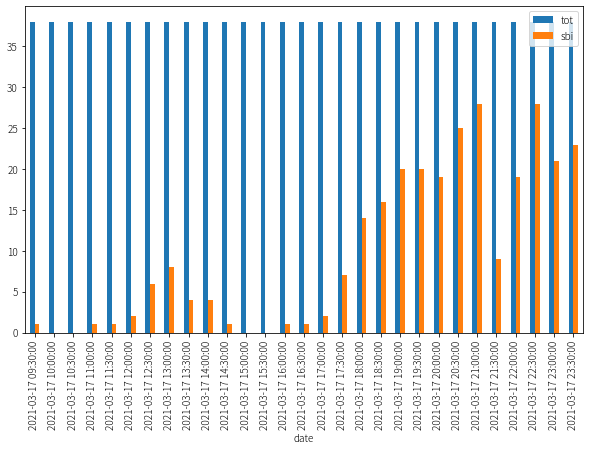

In [81]:
df_30min.plot(kind='bar',figsize=(10,6))

plt.show()

In [82]:
ubike_mean=round(df_30min['sbi'].mean())
ubike_mean

10

In [83]:
for index in df_30min[df_30min['sbi']==0].index:
    print(index.strftime('%H:%M:%S'))

10:00:00
10:30:00
15:00:00
15:30:00


In [84]:
for index in df_30min[df_30min['sbi']>=ubike_mean].index:
    print(index.strftime('%H:%M:%S'))

18:00:00
18:30:00
19:00:00
19:30:00
20:00:00
20:30:00
21:00:00
22:00:00
22:30:00
23:00:00
23:30:00


In [92]:
date=df_date.index[0].strftime('%Y-%m-%d')
date

'2021-03-17'

In [93]:
def show_sna(sna_name,path='pic/'):

    df_sna=df_date.groupby('sna').get_group(sna_name)
    df_30min=df_sna.resample('30min').mean()[['tot','sbi']].round()
    ubike_mean=round(df_30min['sbi'].mean())

    df_30min.plot(kind='bar',figsize=(10,5))

    plt.plot([ubike_mean]*len(df_30min),color='red')

    plt.text(len(df_30min)+1,df_30min['tot'][0],'尖峰時間',fontsize=20,color='red')
    for i,index in enumerate(df_30min[df_30min['sbi']==0].index):
        plt.text(len(df_30min)+1,df_30min['tot'][0]-(5+(i*5)),index.strftime('%H:%M:%S'),fontsize=16)

    plt.text(len(df_30min)+10,df_30min['tot'][0],'離峰時間',fontsize=20,color='blue')
    for i,index in enumerate(df_30min[df_30min['sbi']>=ubike_mean].index):
        plt.text(len(df_30min)+10,df_30min['tot'][0]-(5+(i*5)),index.strftime('%H:%M:%S'),fontsize=16)
    
    plt.text(0,df_30min['tot'][0]+3,f'總車位數:{int(df_30min["tot"][0])}',fontsize=16,color='blue')
    plt.text(len(df_30min)-6,df_30min['tot'][0]+3,f'平均車位數:{int(ubike_mean)}',fontsize=16,color='blue')  
    plt.title(sna_name,fontsize=20)
    #plt.xlabel('Date')
    plt.ylabel('sbi')

    plt.savefig(f'{sna_name}.jpg',bbox_inches='tight')

    plt.show()

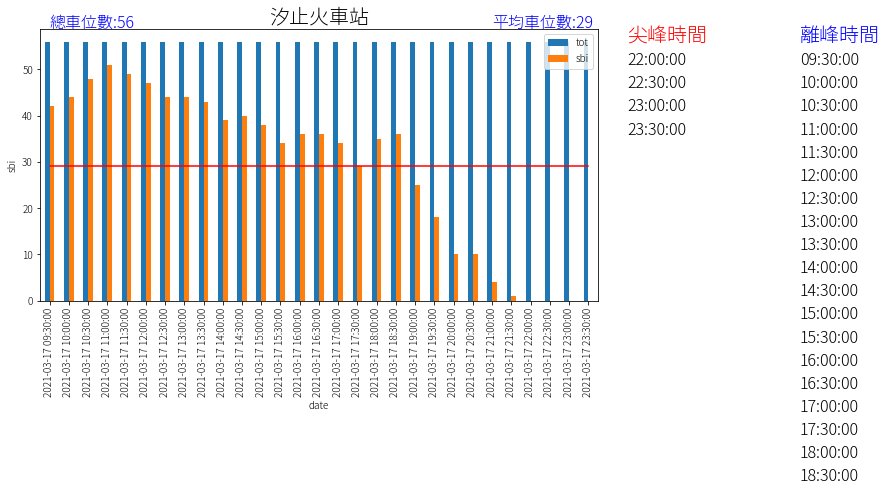

In [94]:
sna_name='汐止火車站'

path=f'pic/{date}/'

show_sna(sna_name,path)

In [ ]:
path=f'pic/{date}/'

if not os.path.exists(path):
    os.makedirs(path)

for sna in set(df_date['sna']):
    print(sna)
    show_sna(sna,path)